In [24]:

q="근로복지공단"


In [25]:
import pandas as pd

df = pd.read_csv("data/%s_청와대 국민청원 및 제안 게시판(utf-8-sig)_전체22.csv"%(q), encoding= 'utf-8-sig')
print("data/%s_카카오_블로그(utf-8-sig).csv"%(q))
df

data/근로복지공단_카카오_블로그(utf-8-sig).csv


,제목,청원시작일,청원마감일,청원인원,링크,내용
0,근로복지공단의 억울한 불승인 및 불친절한 담당직원의 행동에민원을 제기합니다.,2020-09-11,2020-10-11,465,http://www1.president.go.kr/petitions/592692,안녕하세요.? 2019년11월20일경 엄마가 목포시 유달산조경과...
1,근로복지공단 질판위와 재심위의 제도개선,2020-07-29,2020-08-28,272,http://www1.president.go.kr/petitions/591259,상기 본인은 지난 2015년도에 지게차사고로 산재사고를 당했...
2,산업재해보상보험법이 정말 우리 옆에 있습니까,2020-07-21,2020-08-20,473,http://www1.president.go.kr/petitions/590984,작년 11월 9일 저희 남편은 급성뇌경색으로 쓰러졌습니다. 새벽...
3,환경 영향평가 무시하고 교육터전 앗아가는 경남 고성군 상리면 풍력발전 계획을 철회하라,2020-07-15,2020-08-14,229,http://www1.president.go.kr/petitions/590806,"본 국민청원은 경남 고성군 상리면과 하일면 일대 산지 40,99..."
4,영세사업자이며 여행사를 운영합니다. 부부가 함께 일 하는경우 1명이라도 고용유지지원...,2020-07-13,2020-08-12,197,http://www1.president.go.kr/petitions/590616,2020년을 살아가는 전세계 인류가 지금 참 힘든 시기를 겪고 ...
...,...,...,...,...,...,...
635,간병급여 수정제안,2017-09-06,2017-12-05,1,http://www1.president.go.kr/petitions/9503,제가 이렇게 긴 글을 전달하고자 하는 이유는 한가지입니다. 다름...
636,저출산 대책 제안,2017-09-05,2017-12-04,5,http://www1.president.go.kr/petitions/7222,제 목 : 저출산 대책 제안 제안일 : 20...
637,장기요양시설의 현실을 기억해 주십시오.,2017-09-02,2017-10-02,199,http://www1.president.go.kr/petitions/1391,존경하는 대통령님 및 수석 비서관 여러분의 비전과 꿈을 이루어지...
638,"국민연금, 근로복지 공단과 노동부의 관계...",2017-09-01,2017-11-30,1,http://www1.president.go.kr/petitions/1295,대통령님의 4대 보험 강화를 말하면서 정작 그 4대보험 서비스가...


# 제목

In [26]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "관련 관련하 안녕 고용산 은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


['관련', '관련하', '안녕', '고용산', '은', '이', '것', '등', '더', '를']

In [27]:
# import re
# title_sentences = []
# for post in df['내용']:
#     post = str(post)
#     title_sentences.extend(re.split('; |\.|\?|\!', post))
# title_sentences[0:100]

In [28]:
import re
title_sentences = []
for post in df['제목']:
    post=str(post)
    title_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


title_sentences_nouns = []

for senten in title_sentences:
    morphed_data_sentences = [noun_title for noun_title in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP','VA'],combineN=True) if noun_title not in stop_words]
    title_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


title_sentences_nouns_result = []

for i in title_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    title_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

title_result = []

for i in title_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    title_result.append(i)

#title_result

title_result= ",".join(title_result)
title_result = title_result.replace(","," ")
#title_result

final_title = title_result.split(" ")
#final_title

from collections import Counter

wordInfo_title = Counter(final_title)
#wordInfo_title

title_top50 = dict(wordInfo_title.most_common(50))
title_top50

{'근로복지공단': 96,
 '근로자': 37,
 '산업재해': 28,
 '국민': 18,
 '일자리': 18,
 '청원': 16,
 '산재': 15,
 '국민연금': 15,
 '해고': 12,
 '지원': 12,
 '임금체불': 12,
 '실업급여': 12,
 '제도': 12,
 '횡포': 12,
 '직원': 11,
 '대통령': 11,
 '회사': 10,
 '공공기관': 10,
 '정규직': 10,
 '장애인': 10,
 '공무원': 10,
 '정부': 10,
 '부탁': 9,
 '전환': 9,
 '피해': 9,
 '자영업자': 9,
 '갑질': 9,
 '일자리안정자금': 9,
 '요청': 9,
 '부당해고': 9,
 '여성가족부폐': 9,
 '부당': 9,
 '공단': 9,
 '고용보험': 8,
 '환자': 8,
 '산재환자': 8,
 '고용노동부': 8,
 '비정규직': 8,
 '출산': 8,
 '치료': 7,
 '필요': 7,
 '이상': 7,
 '아버지': 7,
 '지급': 7,
 '적폐': 7,
 '개선': 7,
 '유족연금': 7,
 '임금': 7,
 '대한민국': 7,
 '산재보험': 7}

# 내용

In [29]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "정도 경우 관련 관련하 안녕 고용산 은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


['정도', '경우', '관련', '관련하', '안녕', '고용산', '은', '이', '것', '등']

In [30]:
import re
content_sentences = []
for post in df['내용']:
    post= str(post)
    content_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


content_sentences_nouns = []

for senten in content_sentences:
    morphed_data_sentences = [noun_content for noun_content in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP','VA'],combineN=True, eomi= True) if noun_content not in stop_words]
    content_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


content_sentences_nouns_result = []

for i in content_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    content_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

content_result = []

for i in content_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    content_result.append(i)

#title_result

content_result= ",".join(content_result)
content_result = content_result.replace(","," ")
#title_result

final_content = content_result.split(" ")
#final_title

from collections import Counter

wordInfo_content = Counter(final_content)
#wordInfo_title

content_top50 = dict(wordInfo_content.most_common(50))
content_top30 = dict(wordInfo_content.most_common(30))
content_top50

{'없다': 3323,
 '여성': 1506,
 '근로자': 1381,
 '국민': 1166,
 '많다': 1148,
 '근로복지공단': 1028,
 '정부': 944,
 '시간': 921,
 '남자': 873,
 '같다': 847,
 '국가': 829,
 '남성': 750,
 '이유': 734,
 '이상': 724,
 '대한민국': 653,
 '병원': 621,
 '문제': 614,
 '정책': 574,
 '회사': 570,
 '정규직': 557,
 '직원': 521,
 '나라': 516,
 '재산': 495,
 '사업주': 488,
 '상황': 468,
 '여자': 468,
 '내용': 463,
 '임금': 455,
 '장애인': 438,
 '남편': 436,
 '피해자': 435,
 '한국': 429,
 '업무': 427,
 '대통령': 426,
 '좋다': 424,
 '지원': 406,
 '세금': 406,
 '치료': 404,
 '최저임금': 403,
 '본인': 381,
 '전환': 381,
 '무고': 381,
 '산재': 371,
 '일자리': 370,
 '사실': 367,
 '공무원': 367,
 '결과': 365,
 'NAVER': 365,
 '사건': 364,
 '노동자': 354}

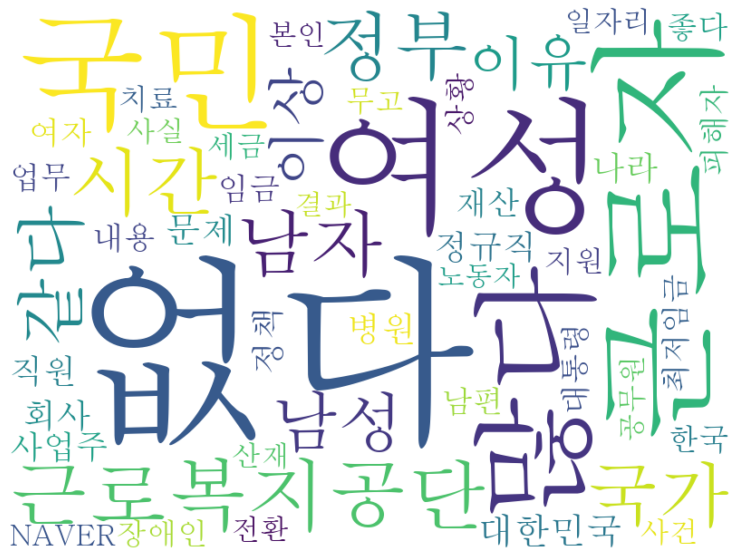

In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='C:/windows/fonts/batang.ttc', width=800, height=600,background_color='white').generate_from_frequencies(content_top50)
plt.figure(figsize=(30,10))
plt.imshow(cloud, interpolation='bilinear')
#plt.title("근로복지공단 칭찬게시판 내용 키워드 TOP50", fontsize= 25)
# 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

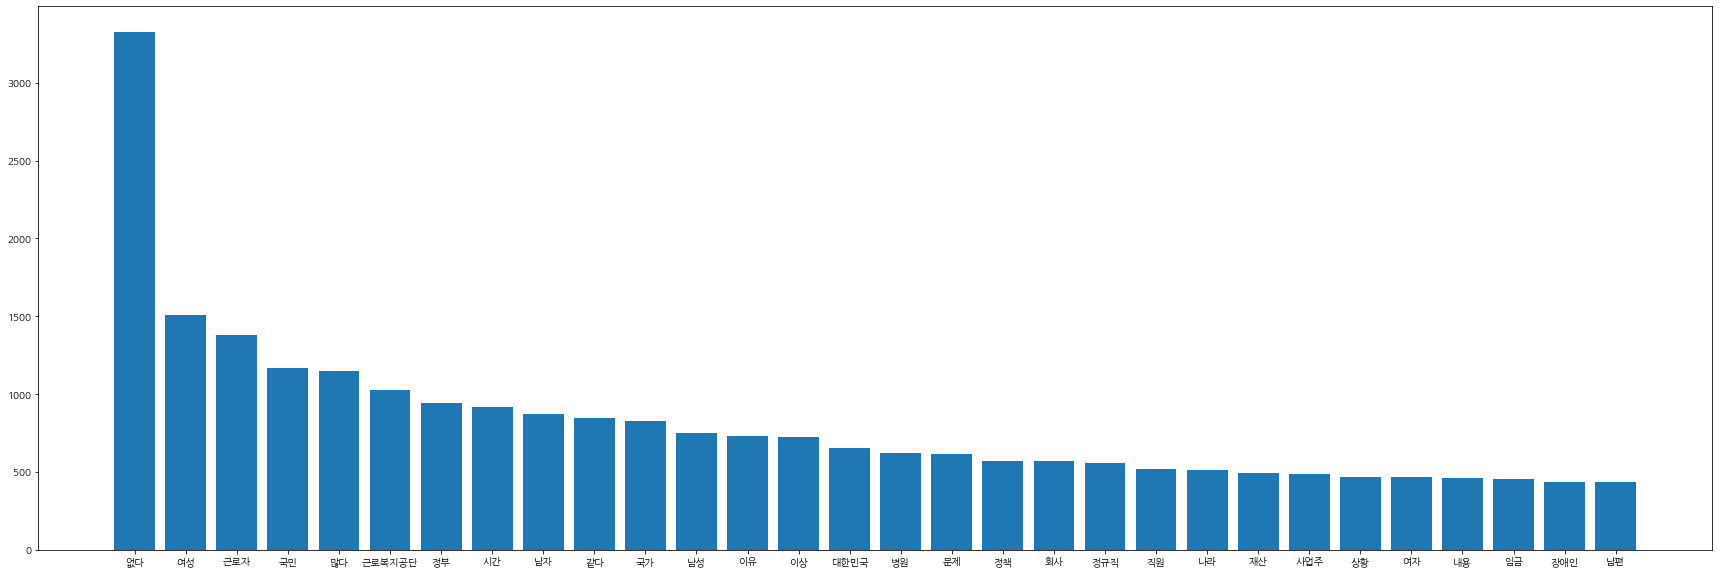

In [36]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

top_content_keys=[i for i in content_top50.keys()]
top_content_values=[i for i in content_top50.values()]

plt.figure(figsize= (30,10))
#plt.title("칭찬합시다 게시판 내용 키워드 Top30", fontsize=20)
plt.bar(list(top_content_keys[:30]), list(top_content_values[:30]))
plt.show()

In [37]:
#content_top_100 

content_top50_word2id = {w: i for i, w in enumerate(content_top50.keys())}
content_top30_word2id = {w: i for i, w in enumerate(content_top30.keys())}

content_top50_word2id

{'없다': 0,
 '여성': 1,
 '근로자': 2,
 '국민': 3,
 '많다': 4,
 '근로복지공단': 5,
 '정부': 6,
 '시간': 7,
 '남자': 8,
 '같다': 9,
 '국가': 10,
 '남성': 11,
 '이유': 12,
 '이상': 13,
 '대한민국': 14,
 '병원': 15,
 '문제': 16,
 '정책': 17,
 '회사': 18,
 '정규직': 19,
 '직원': 20,
 '나라': 21,
 '재산': 22,
 '사업주': 23,
 '상황': 24,
 '여자': 25,
 '내용': 26,
 '임금': 27,
 '장애인': 28,
 '남편': 29,
 '피해자': 30,
 '한국': 31,
 '업무': 32,
 '대통령': 33,
 '좋다': 34,
 '지원': 35,
 '세금': 36,
 '치료': 37,
 '최저임금': 38,
 '본인': 39,
 '전환': 40,
 '무고': 41,
 '산재': 42,
 '일자리': 43,
 '사실': 44,
 '공무원': 45,
 '결과': 46,
 'NAVER': 47,
 '사건': 48,
 '노동자': 49}

In [38]:
content_top50_id2word = {i: w for i, w in enumerate(content_top50.keys())}
content_top30_id2word = {i: w for i, w in enumerate(content_top30.keys())}
content_top50_id2word

{0: '없다',
 1: '여성',
 2: '근로자',
 3: '국민',
 4: '많다',
 5: '근로복지공단',
 6: '정부',
 7: '시간',
 8: '남자',
 9: '같다',
 10: '국가',
 11: '남성',
 12: '이유',
 13: '이상',
 14: '대한민국',
 15: '병원',
 16: '문제',
 17: '정책',
 18: '회사',
 19: '정규직',
 20: '직원',
 21: '나라',
 22: '재산',
 23: '사업주',
 24: '상황',
 25: '여자',
 26: '내용',
 27: '임금',
 28: '장애인',
 29: '남편',
 30: '피해자',
 31: '한국',
 32: '업무',
 33: '대통령',
 34: '좋다',
 35: '지원',
 36: '세금',
 37: '치료',
 38: '최저임금',
 39: '본인',
 40: '전환',
 41: '무고',
 42: '산재',
 43: '일자리',
 44: '사실',
 45: '공무원',
 46: '결과',
 47: 'NAVER',
 48: '사건',
 49: '노동자'}

In [39]:
import numpy as np

# 50 단어 인접행렬
content_adjacent_matrix_50 = np.zeros((50, 50), int)
for sentence in content_sentences_nouns_result:
    for wi, i in content_top50_word2id.items():
        if wi in sentence:
            for wj, j in content_top50_word2id.items():
                if i != j and wj in sentence:
                    content_adjacent_matrix_50[i][j] += 1
content_adjacent_matrix_50

array([[  0, 162, 161, ...,   0,  53,  38],
       [162,   0,   1, ...,   0,  15,   0],
       [161,   1,   0, ...,   0,   6,   7],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [ 53,  15,   6, ...,   0,   0,   3],
       [ 38,   0,   7, ...,   0,   3,   0]])

In [41]:
import numpy as np

# 50 단어 인접행렬
content_adjacent_matrix_30 = np.zeros((30, 30), int)
for sentence in content_sentences_nouns_result:
    for wi, i in content_top30_word2id.items():
        if wi in sentence:
            for wj, j in content_top30_word2id.items():
                if i != j and wj in sentence:
                    content_adjacent_matrix_30[i][j] += 1
content_adjacent_matrix_30

array([[  0, 162, 161, 120, 205, 171, 107, 102,  88, 152,  98, 128, 163,
        110,  84, 121,  93, 143,  76,  35,  80,  64,  42,  70, 132,  26,
         63,  52,  61,  42],
       [162,   0,   1,  60,  72,   1,  54,   6, 165,  45,  97, 228,  69,
         33,  34,   2,  15,  98,   0,   1,   0,  11,  26,   0,   2,  97,
          3,   1,  80,  17],
       [161,   1,   0,  95,  39,  90,  68, 104,   0,  69,  78,   0,  57,
         58,  57,  13,  24,  20,  42,  45,  17,  41,  35, 172,  24,   1,
         15, 112,   7,   8],
       [120,  60,  95,   0,  63,  42,  64,  33,  26,  44, 152,  11,  36,
         21, 172,   7,  35,  39,   6,   2,  15,  43,  28,  54,  16,  25,
         53,  36,  10,  20],
       [205,  72,  39,  63,   0,  48,  38,  34, 122,  58,  41, 142,  63,
         38,  29,  13,  46,  85,  18,  14,  28,  25,  13,   5,  21,  56,
         14,   9,  29,  27],
       [171,   1,  90,  42,  48,   0,  26,  39,   3,  58,  18,   0,  44,
         24,   9,  46,  23,   7,  33,  12,  39,   8,

In [42]:
import networkx as nx

content_network_50 = nx.from_numpy_matrix(content_adjacent_matrix_50)
content_network_30 = nx.from_numpy_matrix(content_adjacent_matrix_30)
#list(title_network_50.adjacency())

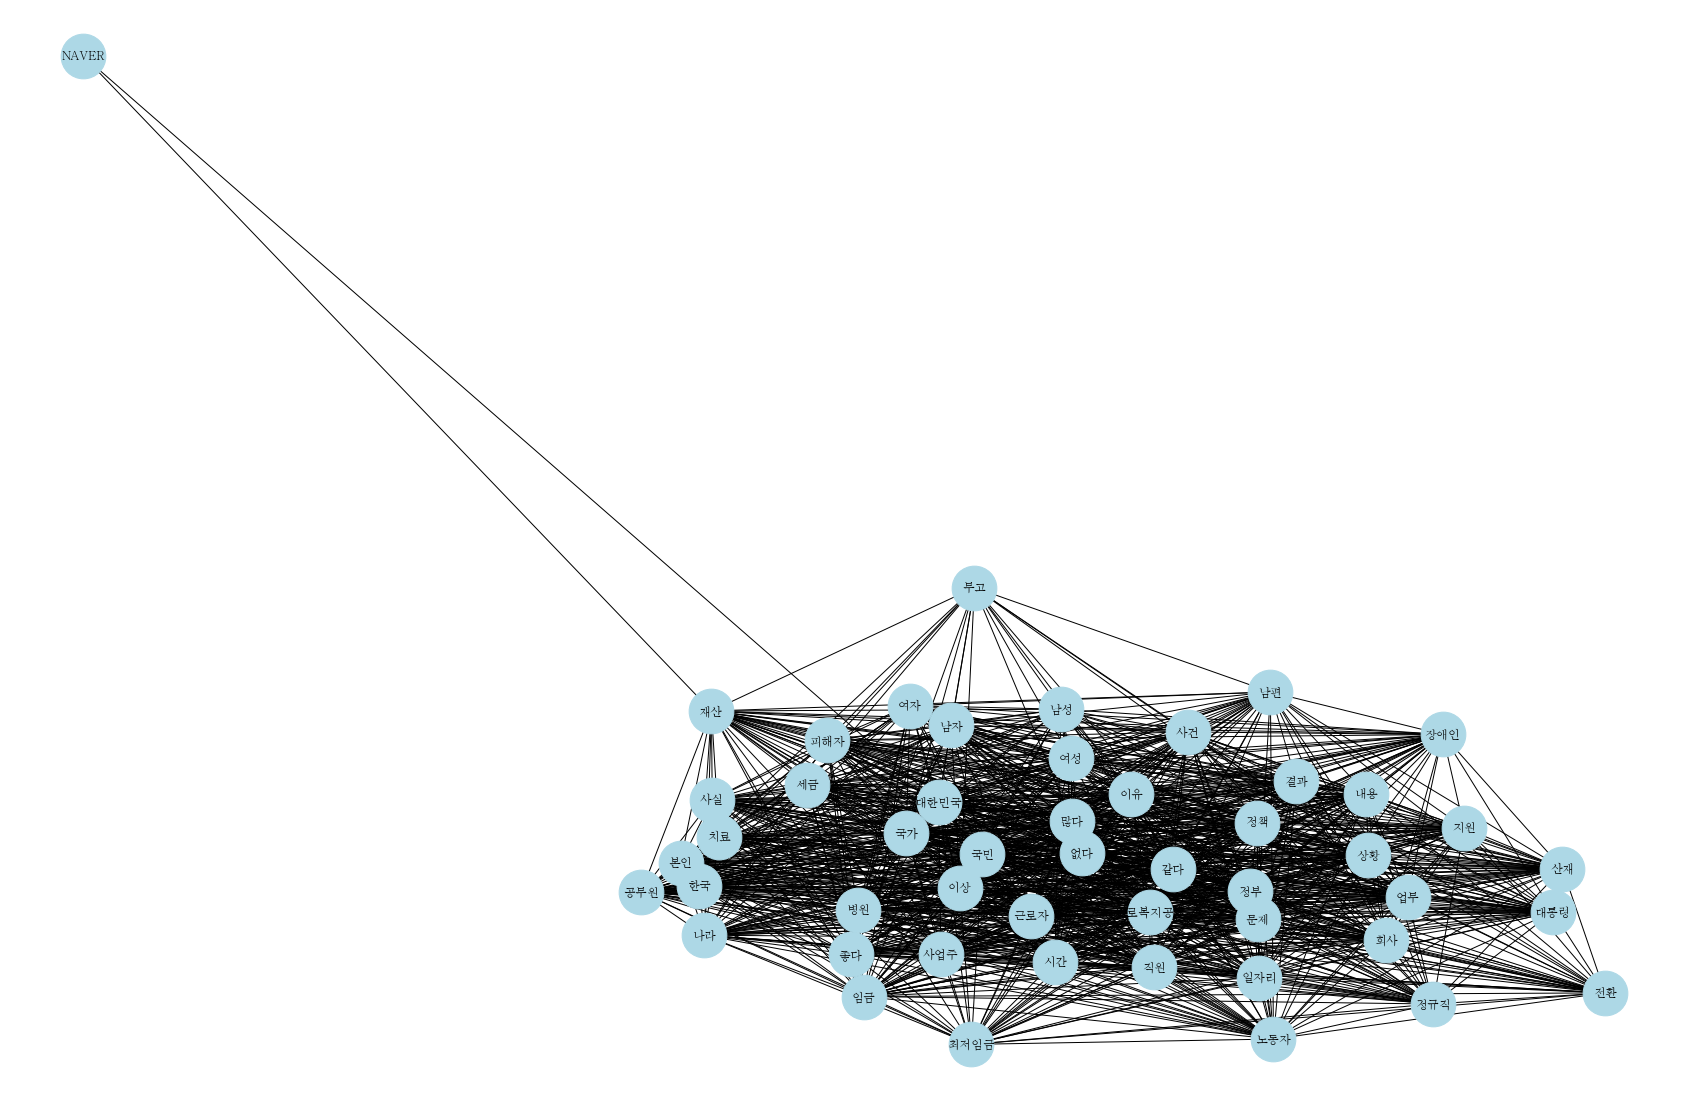

In [43]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(30, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(content_network_50, labels=content_top50_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

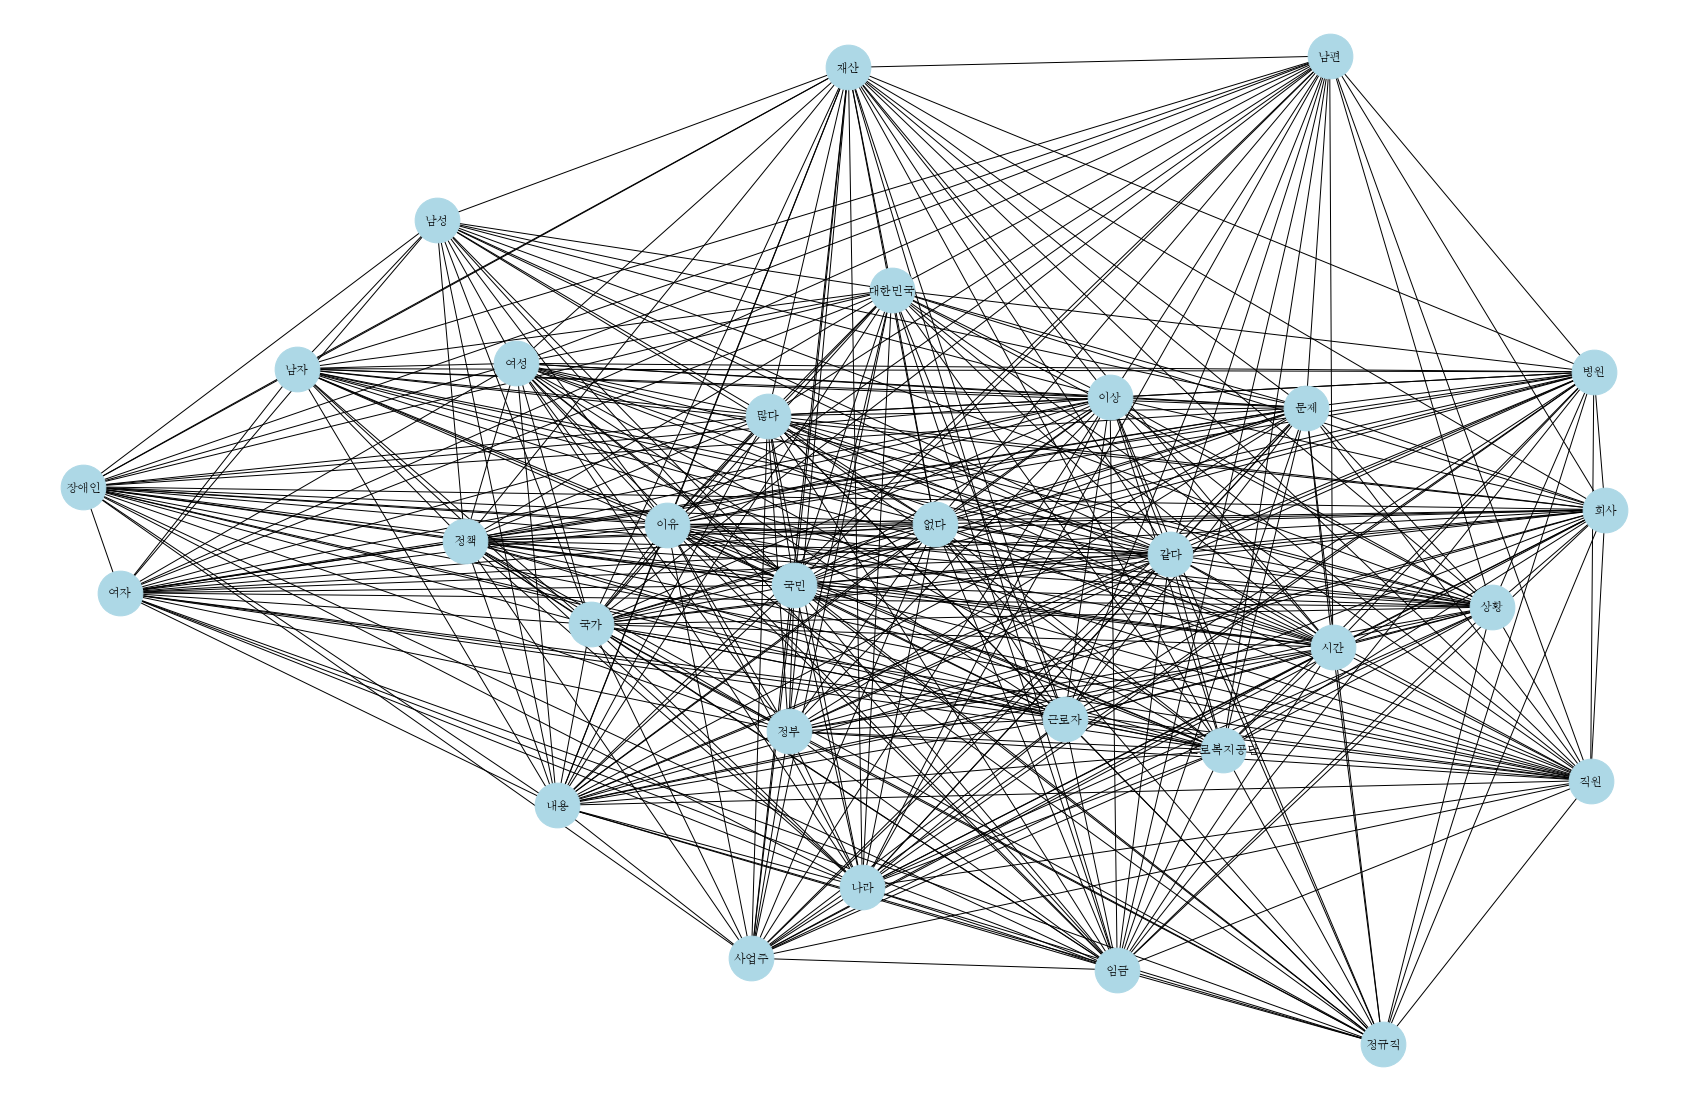

In [45]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(30, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(content_network_30, labels=content_top30_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()